<a href="https://colab.research.google.com/github/Narcilaq/Monografia/blob/main/10_Iteraci%C3%B3n_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import random
import statistics as st

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

from mlxtend.plotting import plot_confusion_matrix

# **Carga del Dataset**

Se carga el 2do Dataset con los registros de tasa de cambio desde github 

In [3]:
Data_2_Tasas=pd.read_excel('https://raw.githubusercontent.com/Narcilaq/Monografia/main/08_2do_Dataset_Tasas.xlsx')
del(Data_2_Tasas['Unnamed: 0'])
Data_2_Tasas

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal_12,Target
0,-0.000098,-0.000102,-0.000098,-0.000096,-0.000103,-0.000105,-0.000099,-0.000098,-0.000099,-0.000104,-0.000096,-0.000101,-0.000101,Alerta_1
1,-0.000117,-0.000120,-0.000116,-0.000115,-0.000122,-0.000124,-0.000117,-0.000117,-0.000118,-0.000123,-0.000115,-0.000120,-0.000120,Alerta_1
2,-0.000222,-0.000230,-0.000221,-0.000218,-0.000234,-0.000238,-0.000223,-0.000223,-0.000225,-0.000235,-0.000218,-0.000229,-0.000229,Alerta_1
3,-0.000330,-0.000339,-0.000330,-0.000327,-0.000343,-0.000348,-0.000333,-0.000333,-0.000334,-0.000345,-0.000328,-0.000340,-0.000340,Alerta_1
4,-0.000186,-0.000193,-0.000185,-0.000183,-0.000196,-0.000199,-0.000187,-0.000187,-0.000188,-0.000197,-0.000182,-0.000192,-0.000192,Alerta_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.013814,-0.014134,-0.014232,-0.014381,-0.014755,-0.014967,-0.014919,-0.015038,-0.015157,-0.015373,-0.015210,-0.015409,-0.015427,Alerta_4
3996,-0.010835,-0.011047,-0.011054,-0.011116,-0.011395,-0.011528,-0.011425,-0.011486,-0.011554,-0.011721,-0.011545,-0.011711,-0.011719,Alerta_4
3997,-0.012646,-0.012911,-0.012952,-0.013051,-0.013380,-0.013550,-0.013462,-0.013547,-0.013638,-0.013832,-0.013652,-0.013839,-0.013851,Alerta_4
3998,-0.012353,-0.012613,-0.012657,-0.012756,-0.013078,-0.013245,-0.013163,-0.013248,-0.013338,-0.013527,-0.013353,-0.013536,-0.013548,Alerta_4


# **Modelos Predictivos**

##**Predicción con SVM Kernel Polinómico de grado 2**

In [ ]:
Se entrena el modelo con la totalidad de los Datos sintéticos

In [4]:
y = Data_2_Tasas.Target
X = Data_2_Tasas.drop(['Target'], axis =1)

Pol2_ovo = svm.SVC(kernel='poly', degree=2, C=1, decision_function_shape='ovo').fit(X, y)

# **Validación**

##**Carga y procesamienot de Datos**

Se cargan nuevamente los datos de validación

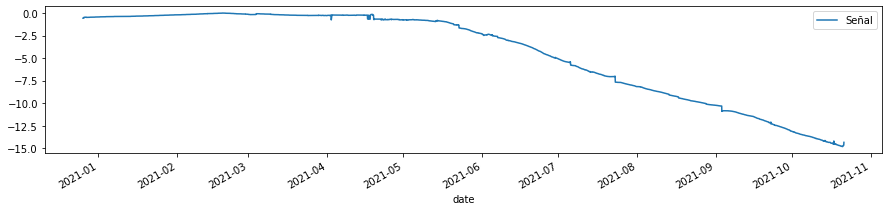

In [5]:
df_epm=pd.read_excel('https://raw.githubusercontent.com/Narcilaq/Monografia/main/04_Exten_E3_P2.xlsx')
df_epm.index = pd.to_datetime(df_epm.TIMESTAMP)
del(df_epm['TIMESTAMP'])
df_epm.index.name="date"
df_epm.plot(figsize=(15,3));

Se procesan los datos para generar el lookback de 13 horas, desde la hora 11 a la hora 24

In [10]:
df_epm_Val=pd.read_excel('https://raw.githubusercontent.com/Narcilaq/Monografia/main/09_Exten_E3_P2_+_Label.xlsx')
df_epm_Val.index = pd.to_datetime(df_epm_Val.date)
del(df_epm_Val['date'])
df_epm_Val.head()

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal_12,Señal,alerta
date,,,,,,,,,,,,,,,
2020-12-26 13:00:00,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,Alerta_1
2020-12-26 14:00:00,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,Alerta_1
2020-12-26 15:00:00,-0.57,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,-0.46,Alerta_1
2020-12-26 16:00:00,-0.57,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,-0.46,-0.46,Alerta_1
2020-12-26 17:00:00,-0.57,-0.57,-0.57,-0.56,-0.56,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,-0.46,-0.46,-0.46,Alerta_1


se aplica engeniería de caracteristicas para transformar los datos de deformación observada desde la hora 11 a 24 a tasas de cambio desde la hora 12 a la 24

In [11]:
Labels = df_epm_Val.alerta
df_epm_Val = (df_epm_Val.drop(['alerta'], axis =1).diff(axis=1).drop(['Señal_0'], axis =1))
df_epm_Val['Target'] = Labels
df_epm_Val.columns =['Señal_0', 'Señal_1', 'Señal_2', 'Señal_3', 'Señal_4', 'Señal_5','Señal_6', 
               'Señal_7', 'Señal_8', 'Señal_9', 'Señal_10', 'Señal_11','Señal_12','Target']

df_epm_Val.head()

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal_12,Target
date,,,,,,,,,,,,,,
2020-12-26 13:00:00,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.09,0.0,0.00,0.00,0.00,Alerta_1
2020-12-26 14:00:00,0.0,0.0,0.00,0.00,0.00,0.01,0.00,0.09,0.00,0.0,0.00,0.00,0.00,Alerta_1
2020-12-26 15:00:00,0.0,0.0,0.00,0.00,0.01,0.00,0.09,0.00,0.00,0.0,0.00,0.00,0.01,Alerta_1
2020-12-26 16:00:00,0.0,0.0,0.00,0.01,0.00,0.09,0.00,0.00,0.00,0.0,0.00,0.01,0.00,Alerta_1
2020-12-26 17:00:00,0.0,0.0,0.01,0.00,0.09,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.00,Alerta_1


## **Evaluación del Modelo**

In [12]:
y_val = df_epm_Val.Target
X_val = df_epm_Val.drop(['Target'], axis =1)
X_val.head()

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal_12
date,,,,,,,,,,,,,
2020-12-26 13:00:00,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.09,0.0,0.00,0.00,0.00
2020-12-26 14:00:00,0.0,0.0,0.00,0.00,0.00,0.01,0.00,0.09,0.00,0.0,0.00,0.00,0.00
2020-12-26 15:00:00,0.0,0.0,0.00,0.00,0.01,0.00,0.09,0.00,0.00,0.0,0.00,0.00,0.01
2020-12-26 16:00:00,0.0,0.0,0.00,0.01,0.00,0.09,0.00,0.00,0.00,0.0,0.00,0.01,0.00
2020-12-26 17:00:00,0.0,0.0,0.01,0.00,0.09,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.00


“Accuracy Pol2 ovo Kernel:” 0.8707349081364829
              precision    recall  f1-score   support

    Alerta_1       0.99      0.93      0.96      8635
    Alerta_2       0.82      0.73      0.77      3299
    Alerta_3       0.13      0.75      0.23       189
    Alerta_4       0.47      0.87      0.61        69

    accuracy                           0.87     12192
   macro avg       0.60      0.82      0.64     12192
weighted avg       0.93      0.87      0.89     12192



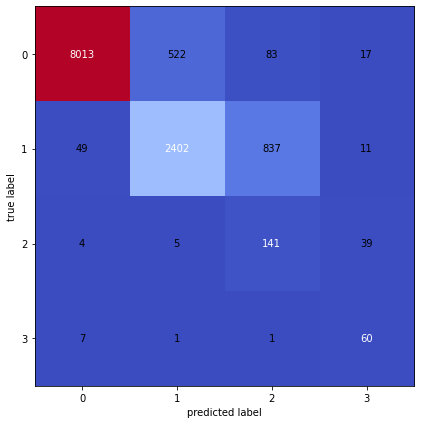

In [17]:
Pol2_ovo_pred_val = Pol2_ovo.predict(X_val)
accuracy_Pol2_ovo_val = Pol2_ovo.score(X_val, y_val)

print('“Accuracy Pol2 ovo Kernel:”', accuracy_Pol2_ovo_val)
print(classification_report(y_val, Pol2_ovo_pred_val))

# creando una matrix de confusion
cm_Pol2_ovo_val = confusion_matrix(y_val, Pol2_ovo_pred_val)
plot_confusion_matrix(conf_mat=cm_Pol2_ovo_val, figsize=(6,6), show_normed=False,cmap='coolwarm')
plt.tight_layout()

Se puede notar que el modelo se encuentra ampliamente desbalanceado entre los niveles de alerta evaluar, produciendo incertidumbre en los resultados.
\
\
A continuación, se tomarán muestras aleatoreas del mismo tamaño que la cantidad de registros etiquetados para el nivel de Alerta 4 y se volverá a ejecutar el modelo



In [33]:
_df_epm_Val_ = df_epm_Val
df_mask_Al_1 = _df_epm_Val_['Target']=="Alerta_1"
filter_Alerta_1 = _df_epm_Val_[df_mask_Al_1].sample(69, random_state=1)

_df_epm_Val_ = df_epm_Val
df_mask_Al_2 = _df_epm_Val_['Target']=="Alerta_2"
filter_Alerta_2 = _df_epm_Val_[df_mask_Al_2].sample(69,random_state=1)

_df_epm_Val_ = df_epm_Val
df_mask_Al_3 = _df_epm_Val_['Target']=="Alerta_3"
filter_Alerta_3 = _df_epm_Val_[df_mask_Al_3].sample(69,random_state=1)

_df_epm_Val_ = df_epm_Val
df_mask_Al_4 = _df_epm_Val_['Target']=="Alerta_4"
filter_Alerta_4 = _df_epm_Val_[df_mask_Al_4].sample(69,random_state=1)

df_epm_Val_Balanced = pd.concat([filter_Alerta_1, filter_Alerta_2, filter_Alerta_3, filter_Alerta_4], axis=0)
df_epm_Val_Balanced

,Señal_0,Señal_1,Señal_2,Señal_3,Señal_4,Señal_5,Señal_6,Señal_7,Señal_8,Señal_9,Señal_10,Señal_11,Señal_12,Target
date,,,,,,,,,,,,,,
2021-09-06 04:45:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Alerta_1
2021-09-04 21:05:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Alerta_1
2021-09-03 22:04:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Alerta_1
2021-05-18 02:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-0.01,0.0,Alerta_1
2021-09-04 23:46:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Alerta_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-03 09:08:00,-0.59,0.00,0.59,0.00,-0.59,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Alerta_4
2021-04-17 06:00:00,0.01,0.00,0.00,0.00,0.00,-0.43,0.00,0.00,0.00,0.0,0.00,0.00,0.0,Alerta_4
2021-04-17 20:00:00,0.00,0.00,0.00,0.00,-0.01,-0.41,0.00,-0.01,0.00,0.0,0.00,0.00,0.0,Alerta_4


In [34]:
y_val_bal = df_epm_Val_Balanced.Target
X_val_bal = df_epm_Val_Balanced.drop(['Target'], axis =1)

“Accuracy Pol2 ovo Kernel:” 0.8152173913043478
              precision    recall  f1-score   support

    Alerta_1       0.86      0.93      0.90        69
    Alerta_2       0.86      0.72      0.79        69
    Alerta_3       0.73      0.74      0.73        69
    Alerta_4       0.81      0.87      0.84        69

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.81       276
weighted avg       0.82      0.82      0.81       276



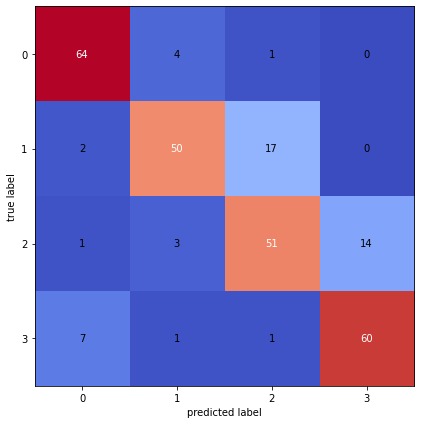

In [35]:
Pol2_ovo_pred_val_bal = Pol2_ovo.predict(X_val_bal)
accuracy_Pol2_ovo_val_bal = Pol2_ovo.score(X_val_bal, y_val_bal)

print('“Accuracy Pol2 ovo Kernel:”', accuracy_Pol2_ovo_val_bal)
print(classification_report(y_val_bal, Pol2_ovo_pred_val_bal))

# creando una matrix de confusion
cm_Pol2_ovo_val_bal = confusion_matrix(y_val_bal, Pol2_ovo_pred_val_bal)
plot_confusion_matrix(conf_mat=cm_Pol2_ovo_val_bal, figsize=(6,6), show_normed=False,cmap='coolwarm')
plt.tight_layout()